# ObsID : 0945070133, SRCNUM : 10, Instru : EPN
**Simbad :** Star (2MASS J03332989-2714334) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4013058032&Name=2MASS%20J03332989-2714334&submit=submit

## ESASky
https://sky.esa.int/esasky/?target=53.37579166666667%20-27.242833333333333&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033329.9-271434
- IAU name : 4XMM J033329.9-271433
- RA : 03h 33m 29.959s
- DEC : -27° 14' 34.10"

``GAIA``
- Designation : Gaia DR3 5060545834987968640
- RA : 03h 33m 29.937s
- DEC : -27° 14' 33.44"
- Parallax : 1.9836 mas
- G : 17.5984

``2MASS``
- Name : 03332989-2714334
- RA : 03h 33m 29.898s
- DEC : -27° 14' 33.48"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [4]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945070133_SRCNUM10_EPN_spectrum_grp_cstat.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  9.166e-03 +/- 1.555e-03 (54.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-119
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7831 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945070133_SRCNUM10_EPN_background_spectrum.fits
  Background Exposure Time: 7832 sec
 Using Response (RMF) File            ObsID0945070133_SRCNUM10_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945070133_SRCNUM10_EPN.arf



In [5]:
n_cts = 9.166e-03*7831

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 71.778946

The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.


## Plot spectrum

In [6]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.000001 0.05")
Plot("data")
spec.ignore("**-0.2 12-**")

     5 channels (1-5) ignored in spectrum #     1
   108 channels (12,119) ignored in spectrum #     1



(-0.5, 857.5, 661.5, -0.5)

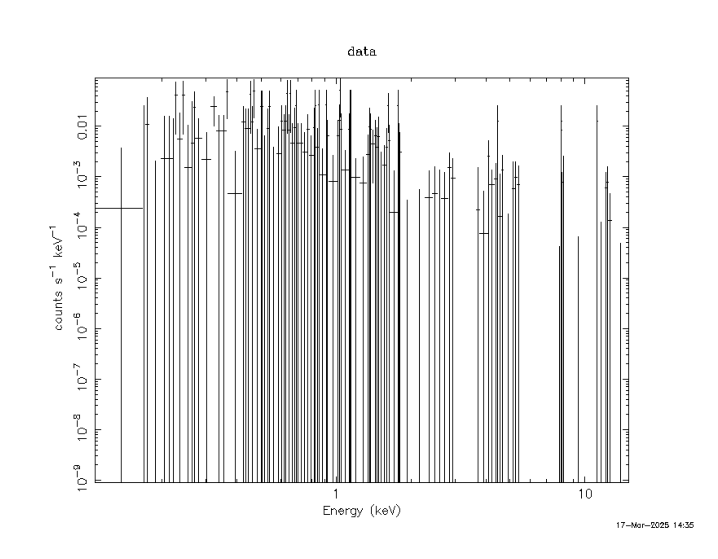

In [7]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum2.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [8]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic                3894.841     using 6 bins.

Test 

(-0.5, 857.5, 659.5, -0.5)

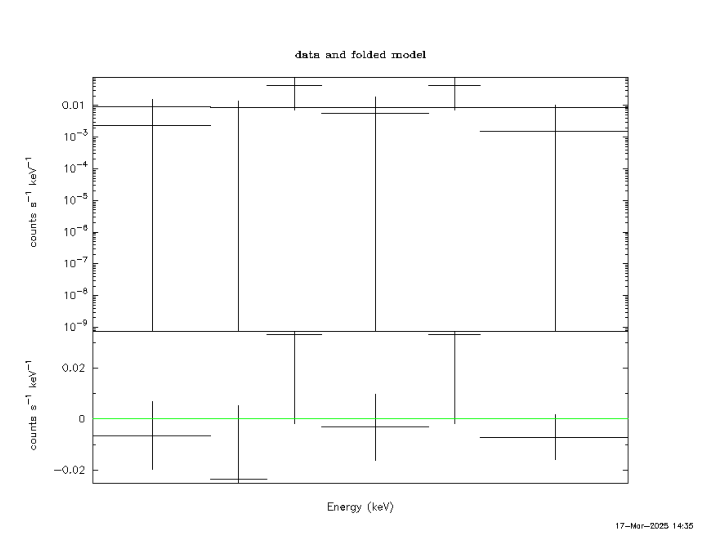

In [9]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody2.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                2690.403     using 6 bins.

Test statistic : Chi-Squared                302187.2     using 6 bins.
 Null hypothesis probability of 0.0e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        3:norm
6.21212      647.03       -3       196.427       2.16708       34.9973
5.82043      0.00210492   -3       62.9946      0.599897       627.028
4.95197      0.687452      0       55.8330      0.644879       937.678
4.30621     

(-0.5, 854.5, 656.5, -0.5)

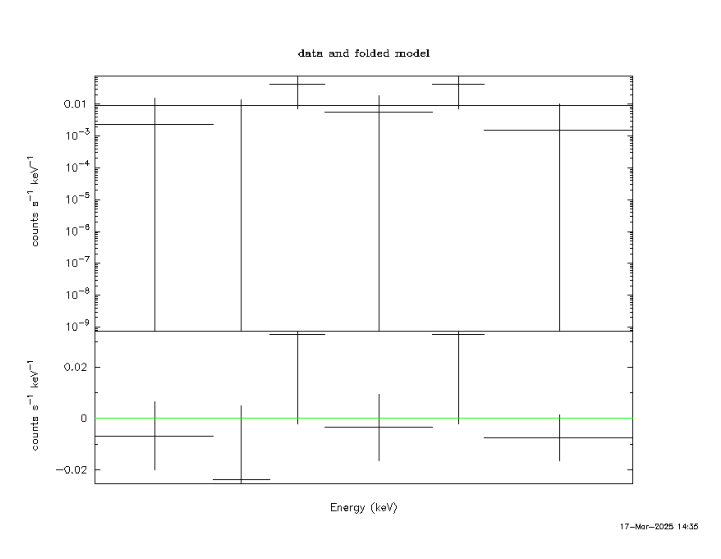

In [11]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss2.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [12]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                2035.710     using 6 bins.

Test statistic : Chi-Squared                175118.9     using 6 bins.
 Null hypothesis probability of 0.0e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH          2:kT        5:norm
1816.19      792.314      -2       4.06150       53.9079       11.3981


(-0.5, 857.5, 659.5, -0.5)

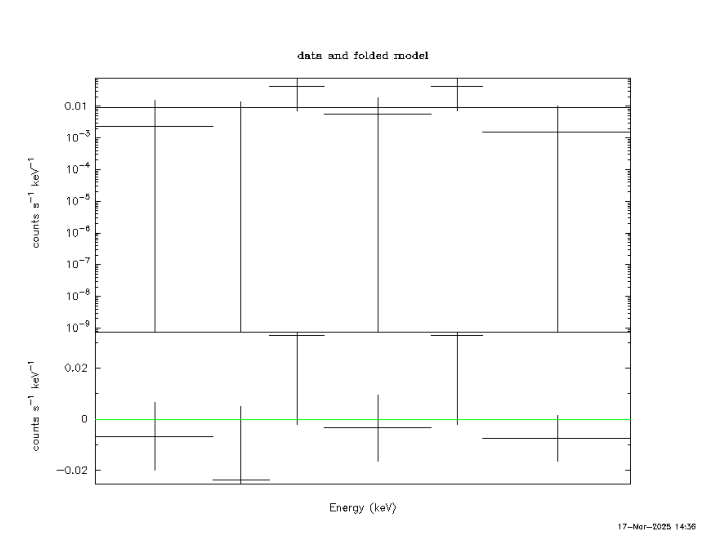

In [13]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec2.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [14]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic                4898.287     using 6 bins.

Test statistic : Chi-Squared                978681.7     using 6 bins.
 Null hypothesis probability of 0.0e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
6.2249       1182.25      -3       340.066       9.20726       5.74583
6.2249       9.53951e-11  -4       47.5075       9.42421       1.29344
 Variances and Principal Axes
                 1        2        3  
 8.7102E+23|

(-0.5, 857.5, 659.5, -0.5)

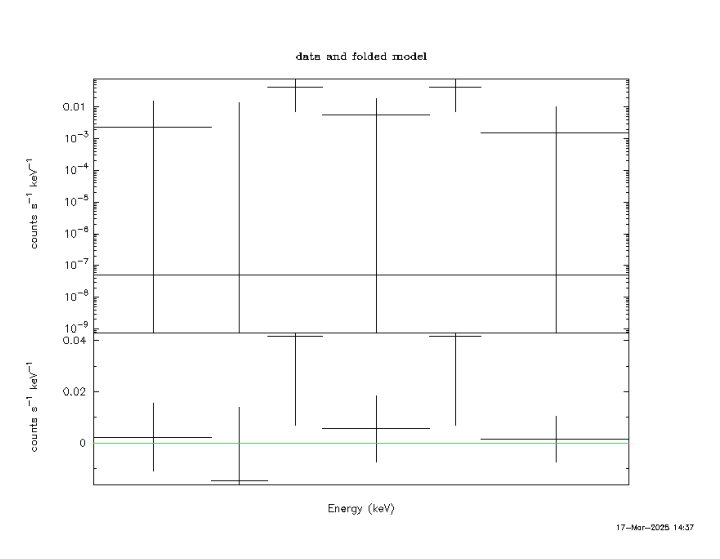

In [16]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw2.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** (GAIA)

- RA = 53.3748310°
- Dec = -27.2428069°

53.37 -27.24

**Column density :** nH = 2*10^20 cm^-2

In [17]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 5427322922807230.0

bremss
(tbabs) : 5.089326534939087e+23

apec
(tbabs) : 3.608625243655514e+23

powerlaw
(tbabs) : 4.7507454983526257e+23


## Flux
### X-ray flux

In [18]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.1556e-07 photons (1.5444e-15 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [19]:
Flux = 1.5444e-15 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray flux : F_X = 1.5444e-15 ergs/cm^2/s


### Optical flux

In [20]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)
    
G = 17.5984

F = F_optical(G)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux : F_opt = 9.590236099191845e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [21]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 0.0016103878820357136
F_x-ray = 0.0016103878820357136*F_optical


## Luminosity

In [22]:
"""GAIA"""

P_mas = 1.9836 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GAIA)
Distance : 1.5556059689453518e+21 cm
Luminosité : 4.696440869812209e+28 erg/s
